https://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.surface.html

In [7]:
import numpy as np
import pandas as pd
from netCDF4 import Dataset
import datetime
import os
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [74]:
df = pd.read_csv("C:/Users/zdunkerton/Documents/GitHubData/Hurricane/atlantic.csv")
df = df.loc[df["Date"]>20000000]
storms = df['ID'].unique()
labels = []
for id in storms:
    storm = df.loc[df["ID"]== id]
    max_wind = storm["Maximum Wind"].max()
    if max_wind < 33:
        labels.append(0)
    elif max_wind >= 33 and max_wind < 63:
        labels.append(1)
    elif max_wind >= 63 and max_wind < 95:
        labels.append(2)
    elif max_wind >= 95:
        labels.append(3)

In [75]:
zero = 0
one = 0
two = 0
three = 0
for x in labels:
    if x == 0:
        zero +=1
    elif x ==1:
        one +=1
    elif x ==2:
        two +=1
    elif x ==3:
        three +=1
print(zero)
print(one)
print(two)
print(three)
print("Total:", zero+one+two+three)

26
126
63
54
Total: 269


In [9]:
df = pd.read_csv("C:/Users/zdunkerton/Documents/GitHubData/Hurricane/atlantic.csv")
df = df.loc[df["Date"]>20000000]
ids = df['ID'].unique()
storms = []
for x in ids:
    current_storm = []
    storm = df.loc[df["ID"]==x]
    date = storm["Date"].values
    time = storm["Time"].values
    i = 0
    date1 = datetime.datetime(1800,1,1,0,0)
    hurricane_times = []
    while i<len(date):
        the_time = time[i]
        the_date = str(date[i])
        if (the_time !=0) and (the_time !=600) and (the_time !=1200) and (the_time !=1800):
            if the_time <=900:
                time[i] = 600
            elif (the_time >900) and (the_time<=1500):
                time[i] = 1200
            elif the_time >1500:
                time[i] = 1800
        hurricane_time = datetime.datetime(int(the_date[:4]), int(the_date[4:6]),int(the_date[6:8]),int(time[i]/100))
        converted_time = (hurricane_time-date1).total_seconds()/3600
        current_storm.append(converted_time)
        i+=1
    while i <120:
        current_storm.append(current_storm[0]-6)
        current_storm = sorted(current_storm)
        i+=1
    storms.append(current_storm)
storms = np.array(storms)
storms.shape

(269, 120)

In [2]:
temp = np.load("C:/Users/zdunkerton/Documents/GitHubData/Hurricane/Preprocessed/Temp_Surface_4xDaily.npy")
temp = temp.reshape(23360, 73,144)
#wind = np.load("C:/Users/zdunkerton/Documents/GitHubData/Hurricane/Preprocessed/UWind_Surface_4xDaily.npy")
#pres = np.load("C:/Users/zdunkerton/Documents/GitHubData/Hurricane/Preprocessed/Pressure_Surface_4xDaily.npy")
#humd = np.load("C:/Users/zdunkerton/Documents/GitHubData/Hurricane/Preprocessed/RelativeHumidity_Surface_4xDaily.npy")

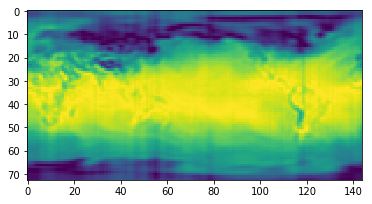

In [8]:
data = []
for s in storms:
    for t in s:
        i = 0
        while i < len(temp):
            if 

In [ ]:
year = 0
data= []
while year < temp.shape[0]:
    day = 0
    while day < temp.shape[1]:
        week = 0
        while week<28:
            temp1 = temp[year][day]
            temp1 = scaler.fit_transform(temp1)
            wind1 = wind[year][day]
            wind1 = scaler.fit_transform(wind1)
            humd1 = humd[year][day]
            humd1 = scaler.fit_transform(humd1)
            pres1 = press[year][day]
            pres1 = scaler.fit_transform(pres1)
            the_data = np.array([temp1,wind1,humd1,pres1])
            data.append(the_data)
            week+=1
        day+=1
    year+=1
data = np.array(data)
data.shape

In [73]:
count = 0
test = storms[1000,:]
for s in storms:
    for t in test:
        if t in time:
            count+=1
count

120960

In [69]:
storms.dtype

dtype('float64')

In [23]:
folder = "C:/users/zdunkerton/documents/githubdata/hurricane/initial_data/Temp_surface_4xDaily"
for filename in os.listdir(folder):
    y = Dataset(folder+"/" +filename,'r').variables["time"]

    if(y.shape[0]>1460):
        y = y[:1460]
    print(y.shape)
    time.append(y[:].tolist())
time = np.array(time)

(1460,)
(1460,)
(1460,)
(1460,)
(1460,)
(1460,)
(1460,)
(1460,)
(1460,)
(1460,)
(1460,)
(1460,)
(1460,)
(1460,)
(1460,)
(1460,)


In [24]:
time.shape

(128, 1460)